### 2. Fashion MNIST (2 points)
Train a multilayer perceptron on the [Fashion MNIST dataset](https://www.openml.org/d/40996). Use at least two hidden layers and rectified linear nonlinearities.
Use the traditional train/test split (first 60.000 instances for training, last 10.000 for testing). Set aside another 10000 samples (from the training set) using statified random sampling (e.g. use StratifiedShuffleSplit). This is meant for model selection and to compute learning curves. Compare a “vanilla” model with a model using drop-out. Visualize learning curves (accuracy vs epochs) for all models. As an estimate, you should expect each model to take less than 30 minutes to train on a CPU.

In [1]:
# Global imports and settings
from preamble import *
import keras
from keras import models, layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print("Using Keras",keras.__version__)
%matplotlib inline
plt.rcParams['figure.dpi'] = 300 # Use 300 for PDF, 100 for slides

Using TensorFlow backend.


Using Keras 2.2.4


#### Data loading

In [2]:
# Download FMINST data
fmnist = oml.datasets.get_dataset(40996)
X, y = fmnist.get_data(target=fmnist.default_target_attribute); 
X = X.reshape(70000, 28, 28)
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size=60000, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=50000, stratify=y_train_val)
print("Training set: ",X_train.shape)
print("Validation set: ", X_val.shape)
print("Test set: ",X_test.shape)

Training set:  (50000, 28, 28)
Validation set:  (10000, 28, 28)
Test set:  (10000, 28, 28)


#### Data preprocessing

In [3]:
X_train = X_train.reshape((50000, 28 * 28)).astype('float32') / 255
X_train_val = X_train_val.reshape((60000, 28 * 28)).astype('float32') / 255
X_val = X_val.reshape((10000, 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((10000, 28 * 28)).astype('float32') / 255

y_train = to_categorical(y_train)
y_train_val = to_categorical(y_train_val)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#### Vanilla model

In [4]:
np.random.seed(1337)

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=40, batch_size=512, verbose=0,
                    validation_data=(X_val, y_val))

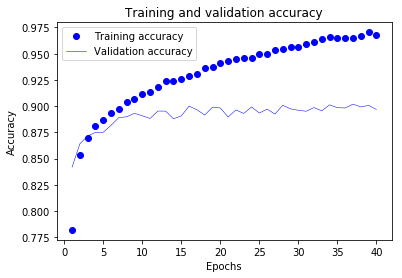

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [7]:
# best epoch
vnl_best_epoch = np.argmin(val_loss)

#### Model with dropout

In [8]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
dpt_model.add(layers.Dropout(0.3))
dpt_model.add(layers.Dense(256, activation='relu'))
dpt_model.add(layers.Dropout(0.4))
dpt_model.add(layers.Dense(128, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(10, activation='softmax'))
dpt_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total para

In [9]:
dpt_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
dpt_model_hist = dpt_model.fit(X_train, y_train,
                               epochs=40, batch_size=512, verbose=0,
                               validation_data=(X_val, y_val))

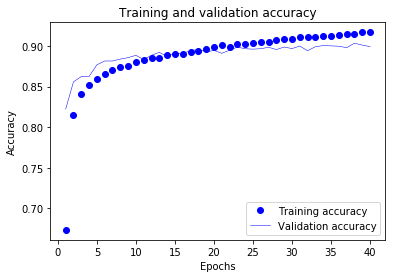

In [10]:
dpt_acc = dpt_model_hist.history['acc']
dpt_val_acc = dpt_model_hist.history['val_acc']
dpt_loss = dpt_model_hist.history['loss']
dpt_val_loss = dpt_model_hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, dpt_acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, dpt_val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [11]:
# best epoch
dpt_best_epoch = np.argmin(dpt_val_loss)

#### Compare validation scores

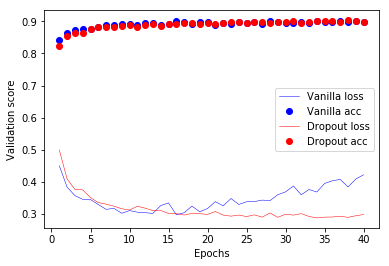

In [12]:
plt.plot(epochs, val_loss, 'b-', label='Vanilla loss')
plt.plot(epochs, val_acc, 'bo', label='Vanilla acc')
plt.plot(epochs, dpt_val_loss, 'r-', label='Dropout loss')
plt.plot(epochs, dpt_val_acc, 'ro', label='Dropout acc')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()

plt.show()

When we compare the loss score between vanilla model and model with dropout, we can see that dropout-regularized model converge slower but less prone to overfitting. In contrast, vanilla model start to overfit after only 12 epochs. In terms of accuracy, there is no disctintive gap between the two models.

#### Use best models to check the test score

Retrain every model with the best epochs in terms of lowest validation loss score. Use both train and validation set because we want to find the performance for test set.

In [13]:
vnl_model = models.Sequential()
vnl_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
vnl_model.add(layers.Dense(256, activation='relu'))
vnl_model.add(layers.Dense(128, activation='relu'))
vnl_model.add(layers.Dense(10, activation='softmax'))

vnl_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

vnl_model_hist = vnl_model.fit(X_train_val, y_train_val,
                    epochs=vnl_best_epoch, batch_size=512, verbose=0)

In [14]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
dpt_model.add(layers.Dropout(0.3))
dpt_model.add(layers.Dense(256, activation='relu'))
dpt_model.add(layers.Dropout(0.4))
dpt_model.add(layers.Dense(128, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(10, activation='softmax'))

dpt_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

dpt_model_hist = dpt_model.fit(X_train_val, y_train_val,
                       epochs=dpt_best_epoch, batch_size=512, verbose=0)

In [15]:
vnl_test_loss, vnl_test_acc = vnl_model.evaluate(X_test, y_test, verbose=0)
dpt_test_loss, dpt_test_acc = dpt_model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy (Vanilla):', vnl_test_acc)
print('Test loss (Vanilla):', vnl_test_loss)
print('Test accuracy (w/Dropout):', dpt_test_acc)
print('Test loss (w/Dropout):', dpt_test_loss)

Test accuracy (Vanilla): 0.8903
Test loss (Vanilla): 0.32216709393262866
Test accuracy (w/Dropout): 0.8959
Test loss (w/Dropout): 0.29489456206560133


Using optimal number of epochs, model with dropout layers is slightly better in accuracy and 10% lower in loss compared to vanilla model for the test set. Based on the observed validation loss plot, dropout layers slightly improve the result because dropout helps regularize the model. 